# Test the validity of all the operators

In [135]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib


# Get the parent directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


import solvers
importlib.reload(solvers)
import utils
importlib.reload(utils)

<module 'utils' from 'd:\\PhD at UCLA\\Spring 2025\\MAE 250H\\MAE-250H\\utils.py'>

In [136]:
'''
Create staggered grid for all the operators
'''
Lx = 1
Ly = 1
Nx = 10
Ny = 10
initial_condition = np.zeros((Nx, Ny))


staggered_grid = utils.staggered_grid(Lx, Ly, Nx, Ny, initial_condition)
spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid = staggered_grid.get_grid()
grids = [spatial_mesh_grid, pressure_mesh_grid, u_mesh_grid, v_mesh_grid, vorticity_mesh_grid]

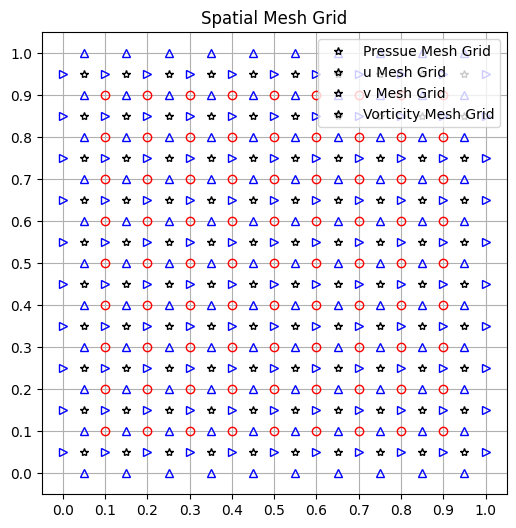

In [137]:
markers = ['P', '*', '>', '^', 'o']
marker_edge_color = ['black', 'black', 'blue', 'blue', 'red']
fig, ax = plt.subplots(figsize=(6, 6))
# Use the spatial mesh grid to plot the grid
X, Y = spatial_mesh_grid

x_ticks = X[0, :]
y_ticks = Y[:, 0]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)



for i in range(1, len(grids)):
    X_plot, Y_plot = grids[i]

    plt.plot(X_plot, Y_plot, markers[i], markerfacecolor='none', markeredgecolor=marker_edge_color[i])

plt.title('Spatial Mesh Grid')
plt.grid(axis='both')
plt.legend(["Pressue Mesh Grid", "u Mesh Grid", "v Mesh Grid", "Vorticity Mesh Grid"])
plt.show()

In [138]:
print(Y[:, 0])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [139]:
'''
Divergence operator verification
'''

'\nDivergence operator verification\n'